# Ferramenta para calculo de Spread entre pares de ações

## Importando os módulos

In [5]:
!pip install yfinance
import pandas as pd
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# definindo os pares que vamos utilizar.
par_copel = ['CPLE3.SA', 'CPLE6.SA']

# definindo data inicial e final para pesquisar cotações - formato deve ser: ANO-MES-DIA
data_inicial = '2022-01-01'
data_final = '2022-06-30'

## Pegando os dados de cada par e jogando em seu respectivo dataframe

In [12]:
cple3 = yf.Ticker(par_copel[0])
df_cple3 = cple3.history(start=data_inicial, end=data_final)
cple6 = yf.Ticker(par_copel[1])
df_cple6 = cple6.history(start=data_inicial, end=data_final)

In [13]:
columns_name = ['Abertura', 'Alta', 'Baixa', 'Fechamento', 'Volume', 'Dividendos', 'Desdobramentos']
df_cple3.columns = columns_name
df_cple3.reset_index(inplace=True)
df_cple3.drop(['Alta', 'Baixa', 'Volume', 'Dividendos', 'Desdobramentos'], axis=1, inplace=True)
display(df_cple3)

,Date,Abertura,Fechamento
0,2022-01-03,5.631349,5.538576
1,2022-01-04,5.566408,5.473635
2,2022-01-05,5.473635,5.334475
3,2022-01-06,5.343752,5.325197
4,2022-01-07,5.325197,5.223146
...,...,...,...
118,2022-06-23,6.340000,6.190000
119,2022-06-24,6.240000,6.290000
120,2022-06-27,6.230000,6.380000
121,2022-06-28,6.400000,6.390000


In [14]:
df_cple6.columns = columns_name
df_cple6.reset_index(inplace=True)
df_cple6.drop(['Alta', 'Baixa', 'Volume', 'Dividendos', 'Desdobramentos'], axis=1, inplace=True)
display(df_cple6)

,Date,Abertura,Fechamento
0,2022-01-03,5.972762,5.982065
1,2022-01-04,6.019278,5.916942
2,2022-01-05,5.935549,5.842515
3,2022-01-06,5.842515,5.693661
4,2022-01-07,5.684358,5.675054
...,...,...,...
118,2022-06-23,7.070000,6.880000
119,2022-06-24,6.920000,6.930000
120,2022-06-27,6.940000,7.040000
121,2022-06-28,7.090000,6.990000


## Unindo os dois DataFrames em um novo

In [18]:
df_copel = pd.merge(df_cple3, df_cple6, how = 'left', on = 'Date')
final_columns = ['Data', 'Abertura CPLE3', 'Fechamento CPLE3', 'Abertura CPLE6', 'Fechamento CPLE6']
df_copel.columns = final_columns
def sub(a,b):
  return a-b

df_copel['Diferença Abertura'] = df_copel.apply(lambda f: sub(f['Abertura CPLE6'], f['Abertura CPLE3']), axis=1)
df_copel['Diferença Fechamento'] = df_copel.apply(lambda f: sub(f['Fechamento CPLE6'], f['Fechamento CPLE3']), axis=1)
df_copel

,Data,Abertura CPLE3,Fechamento CPLE3,Abertura CPLE6,Fechamento CPLE6,Diferença Abertura,Diferença Fechamento
0,2022-01-03,5.631349,5.538576,5.972762,5.982065,0.341412,0.443489
1,2022-01-04,5.566408,5.473635,6.019278,5.916942,0.452870,0.443307
2,2022-01-05,5.473635,5.334475,5.935549,5.842515,0.461914,0.508040
3,2022-01-06,5.343752,5.325197,5.842515,5.693661,0.498763,0.368464
4,2022-01-07,5.325197,5.223146,5.684358,5.675054,0.359161,0.451908
...,...,...,...,...,...,...,...
118,2022-06-23,6.340000,6.190000,7.070000,6.880000,0.730000,0.690000
119,2022-06-24,6.240000,6.290000,6.920000,6.930000,0.680000,0.640000
120,2022-06-27,6.230000,6.380000,6.940000,7.040000,0.710000,0.660000
121,2022-06-28,6.400000,6.390000,7.090000,6.990000,0.690000,0.600000


In [20]:
with pd.ExcelWriter('spread-copel.xlsx') as writer:
  df_cple3.to_excel(writer, sheet_name='CPLE3')
  df_cple6.to_excel(writer, sheet_name='CPLE6')
  df_copel.to_excel(writer, sheet_name='SPREAD')

## *Plotando os gráficos*

### Gráfico com o matplotlib

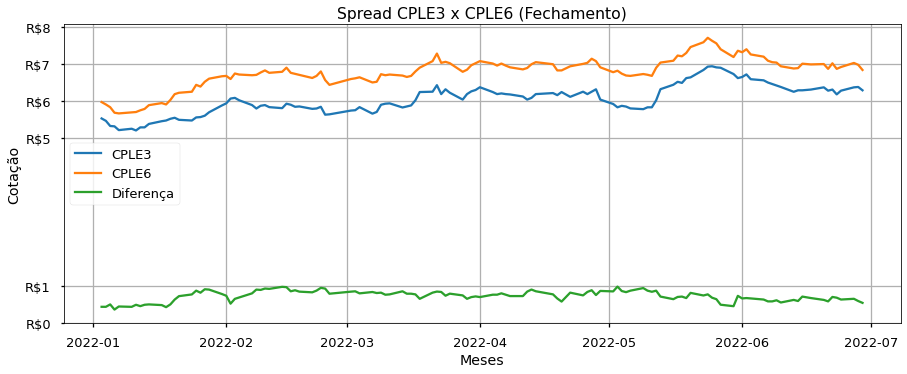

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


dados_x = df_copel[['Data']]
dados_x.set_index('Data')
dados_y = df_copel
dados_y = dados_y.drop(['Data', 'Abertura CPLE3', 'Abertura CPLE6', 'Diferença Abertura'], axis=1)
dados_y.set_index('Fechamento CPLE3')
dados_diff = dados_y['Diferença Fechamento']
dados_diff = pd.DataFrame(dados_diff)
dados_diff.set_index('Diferença Fechamento')
plt.plot(dados_x, dados_y)

plt.legend(['CPLE3', 'CPLE6', 'Diferença'])
plt.title('Spread CPLE3 x CPLE6 (Fechamento)')
plt.xlabel('Meses')
plt.ylabel('Cotação')
plt.yticks([0,1,5, 6, 7, 8], ['R$0', 'R$1', 'R$5', 'R$6', 'R$7', 'R$8'])
# datas = ['2022-01', '2022-02', '2022-03', '2022-04', '2022-05','2022-06','2022-07']
# plt.xticks(datasf, ['Jan','Fev', 'Mar','Abr','Mai','Jun','Jul'])
plt.figure.dpi=100
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = (15, 5.5)
plt.rcParams["legend.loc"] = 'center left'
plt.grid()
plt.savefig('COPEL.png', dpi=250)
plt.show()

### Gráficos com o Plotly

In [31]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# from kaleido.scopes.plotly import PlotlyScope


fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=df_copel['Data'],y=df_copel['Fechamento CPLE3'], name='CPLE3',
    line_shape='spline'),
    secondary_y= False,
)
fig.add_trace(
    go.Scatter(x=df_copel['Data'],y=df_copel['Fechamento CPLE6'], name='CPLE6',
               line_shape='spline'),
    secondary_y= False,
)
fig.add_trace(
    go.Scatter(x=df_copel['Data'],y=df_copel['Diferença Fechamento'], name='Diferença',
               line_shape='spline'),
    secondary_y= False,
)
fig.update_xaxes(title_text="Mês (2022)")
fig.update_yaxes(title_text="Cotação")

fig.update_layout(
    width=900,
    height=400,
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,5,6,7,8],
        ticktext = ['R$ 0', 'R$ 1', 'R$ 5', 'R$ 6', 'R$ 7', 'R$ 8']
    )
)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
        ticktext = ['Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
    )
)
fig.update_traces(textposition="bottom right")
fig.update_traces(connectgaps=True)
fig.show()
# scope = PlotlyScope(
#     plotlyjs="https://cdn.plot.ly/plotly-latest.min.js",
#     # plotlyjs="/path/to/local/plotly.js",
# )

# with open("spread.png", "wb") as f:
#     f.write(scope.transform(fig, format="png"))

In [48]:
diff = px.line(x=df_copel['Data'], y=df_copel['Diferença Fechamento'], line_shape='spline',
               labels={'y': 'Diferença Cotação (R$)', 'x': 'Mês (2022)'})
diff.update_traces(connectgaps=True)

diff.add_trace(go.Scatter(
        hovertemplate = 'Preço: %{y:$.2f}<extra></extra>',
))
diff.update_traces(hovertemplate='Data: %{x|%d/%m/%Y} <br>Diferença Cotação: R$ %{y:.2f}') #

diff.update_layout(
    width=900,
    height=300,
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0, 0.5, 0.75, 0.95],
        ticktext = ['R$ 0', 'R$ 0,50', 'R$ 0,75', 'R$ 0,95']
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
        ticktext = ['Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Roboto",
    )
)
diff.show()

# scope = PlotlyScope(
#     plotlyjs="https://cdn.plot.ly/plotly-latest.min.js",
#     # plotlyjs="/path/to/local/plotly.js",
# )

# with open("diferenca_fech.png", "wb") as f:
#     f.write(scope.transform(diff, format="png"))

In [39]:
datetime = '2022-02-01'
print(datetime)
{x|%Y/%m/%d %H:%M:%S.%L}

2022-02-01
